In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load the dataset
df = pd.read_csv('/content/accident data.csv')
df.head()


<ipython-input-13-6f8e08df2210>:2: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/accident data.csv')


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [21]:
# Display column names
print(df.columns)

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour'],
      dtype='object')


In [14]:

# Summary statistics
print(df.describe())

            Severity      Start_Lat      Start_Lng        End_Lat  \
count  209611.000000  209611.000000  209611.000000  209611.000000   
mean        2.404559      36.962546     -95.437195      36.962627   
std         0.685944       4.925512      17.529335       4.925614   
min         2.000000      25.129476    -124.422706      25.130927   
25%         2.000000      33.839466    -117.367592      33.839870   
50%         2.000000      37.543224     -88.168270      37.543170   
75%         3.000000      40.795660     -80.839650      40.796049   
max         4.000000      49.000580     -67.113167      49.075000   

             End_Lng   Distance(mi)         Number  Temperature(F)  \
count  209611.000000  209611.000000   46365.000000   205234.000000   
mean      -95.437060       0.700410    7195.958309       62.190401   
std        17.529378       1.740397   13814.948660       18.339811   
min      -124.422706       0.000000       1.000000      -20.200000   
25%      -117.366854       0

In [15]:

# Check for missing values
print(df.isnull().sum())


ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   163246
Street                        1
Side                          1
City                         21
County                        1
State                         1
Zipcode                     134
Country                       1
Timezone                    150
Airport_Code                315
Weather_Timestamp          1932
Temperature(F)             4377
Wind_Chill(F)            174769
Humidity(%)                4636
Pressure(in)               3406
Visibility(mi)             5002
Wind_Direction             1949
Wind_Speed(mph)           34580
Precipitation(in)        183793
Weather_Condition          4885
Amenity                       1
Bump    

***Analyze Patterns Related to Road Conditions, Weather, and Time of Day:***


In [52]:

# Convert 'Start_Time' to datetime with mixed formats
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')


In [17]:
# Drop rows with invalid dates if any
df = df.dropna(subset=['Start_Time'])

# Extract hour from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour

<ipython-input-18-5dd75b51d214>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hour'], palette='viridis')


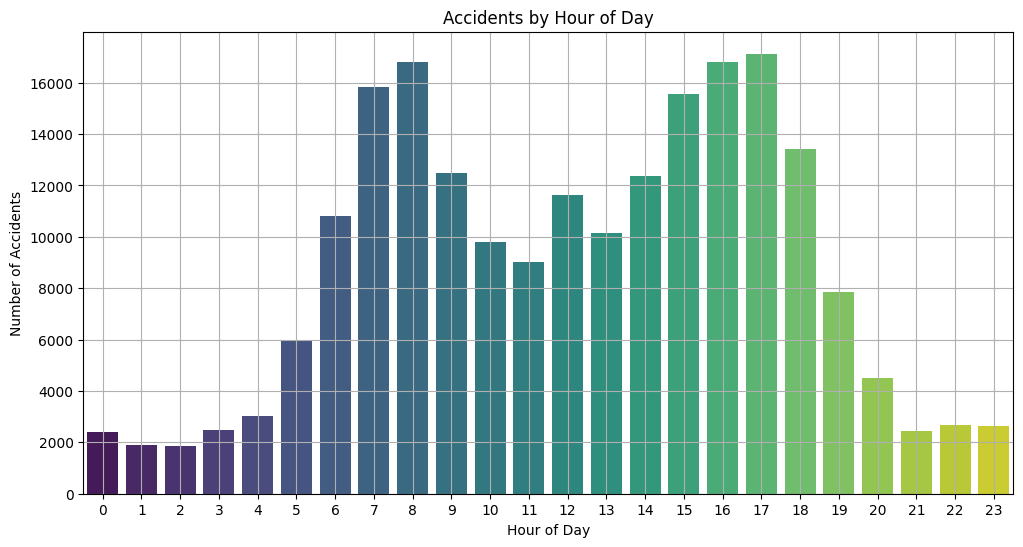

In [18]:
# Plot accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Hour'], palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.grid(True)
plt.show()

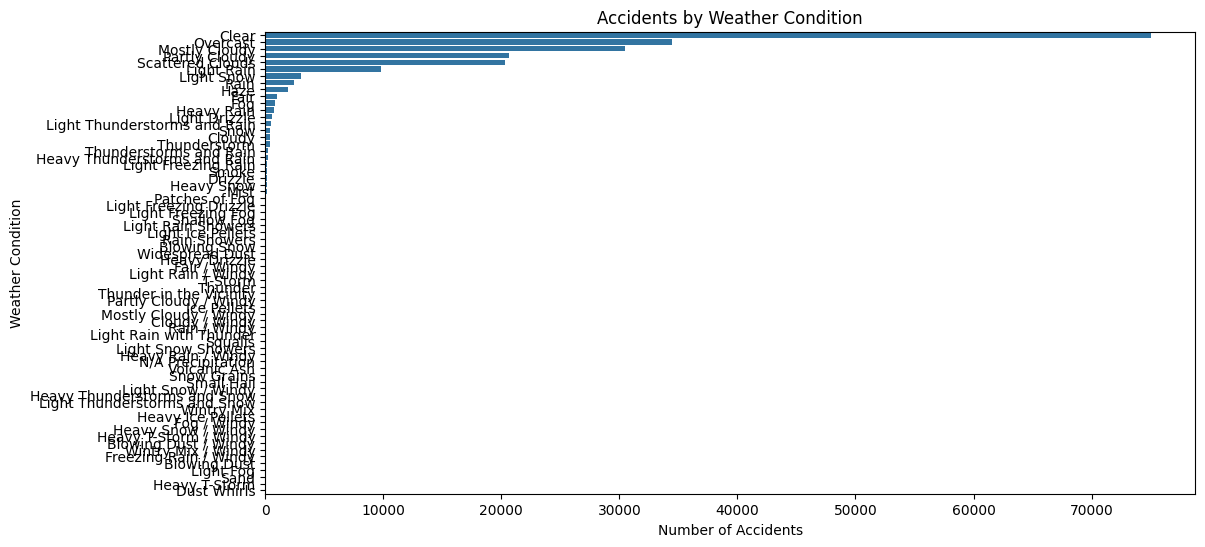

In [19]:
# Weather Conditions Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Weather_Condition'], order=df['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

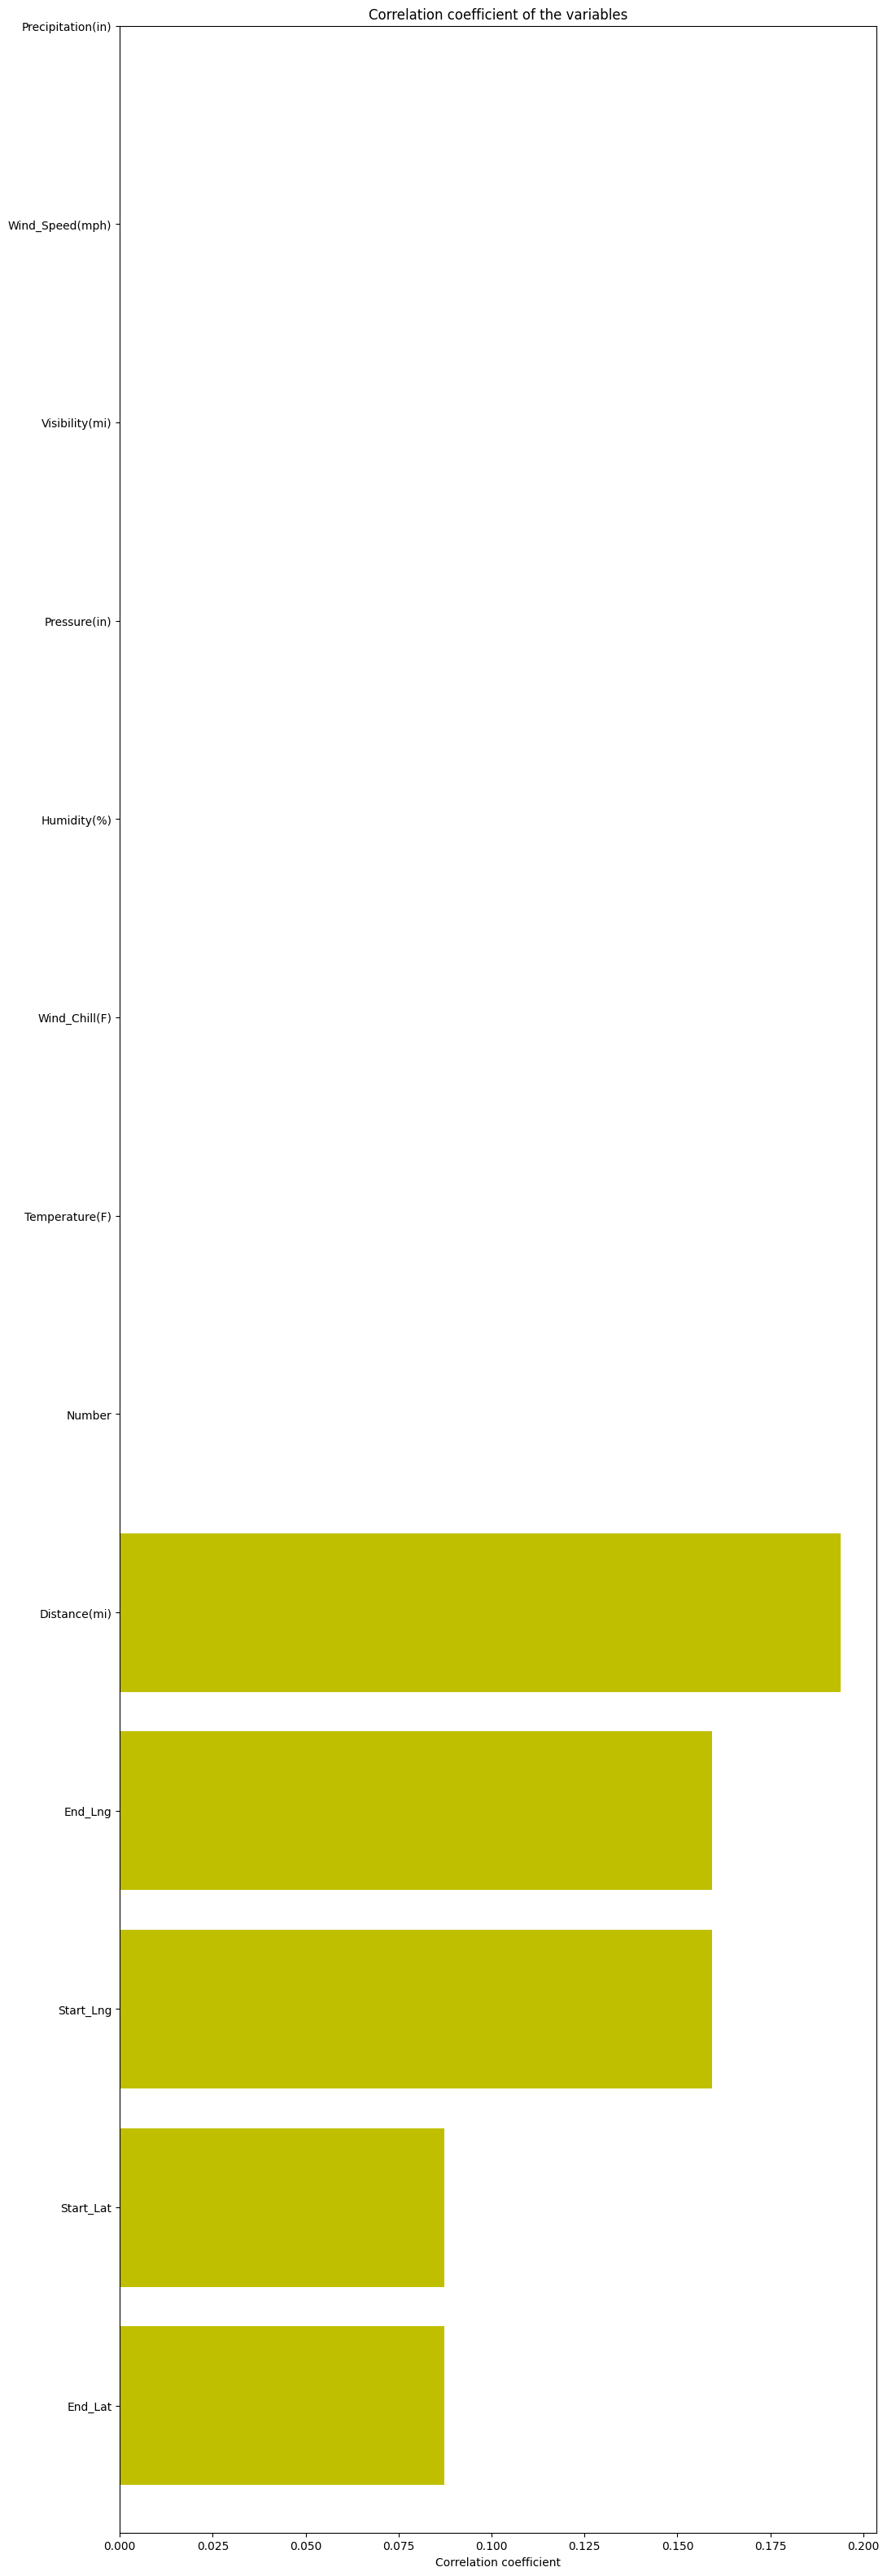

In [23]:
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.Severity.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

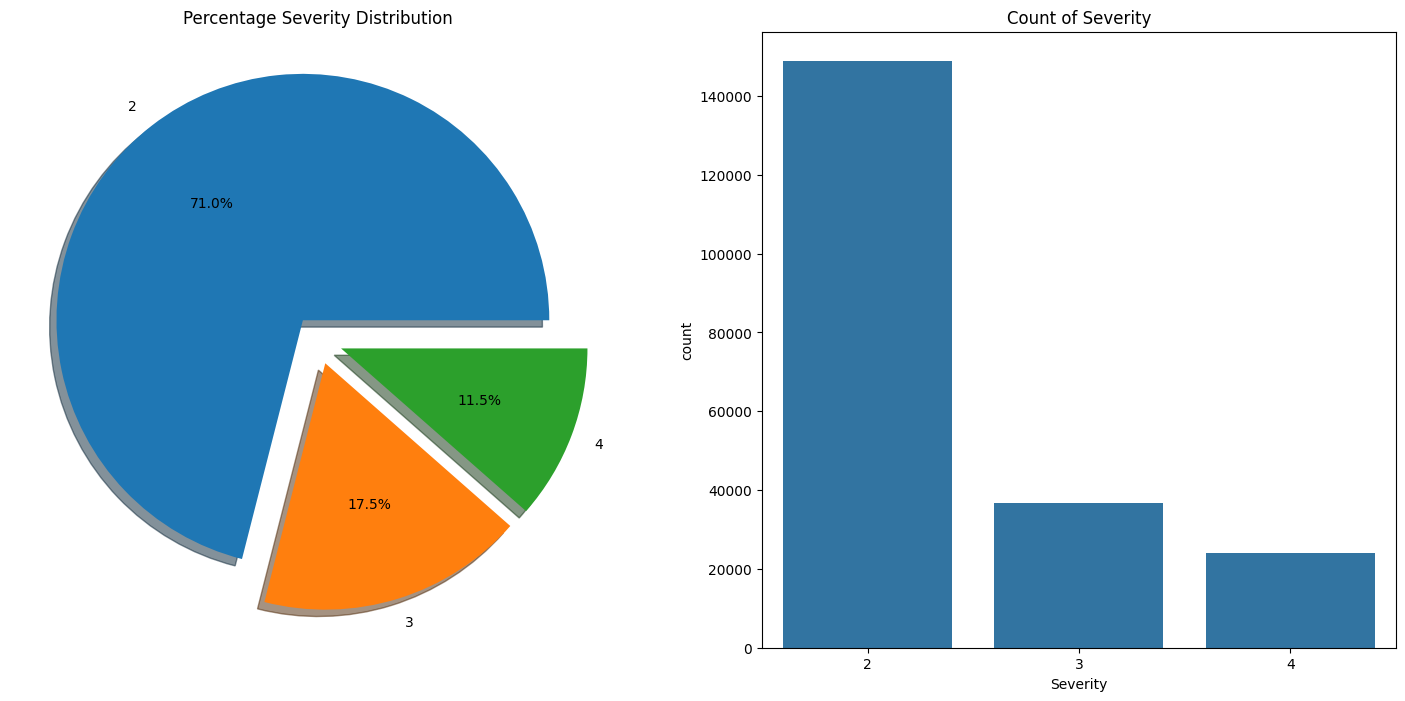

In [27]:

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot pie chart for severity distribution
severity_counts = df['Severity'].value_counts()
explode = [0.1] * len(severity_counts)  # Create explode list with 0.1 for each severity level
severity_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('')

# Plot count plot for severity
sns.countplot(x='Severity', data=df, ax=ax[1], order=severity_counts.index)
ax[1].set_title('Count of Severity')

# Show plots
plt.show()

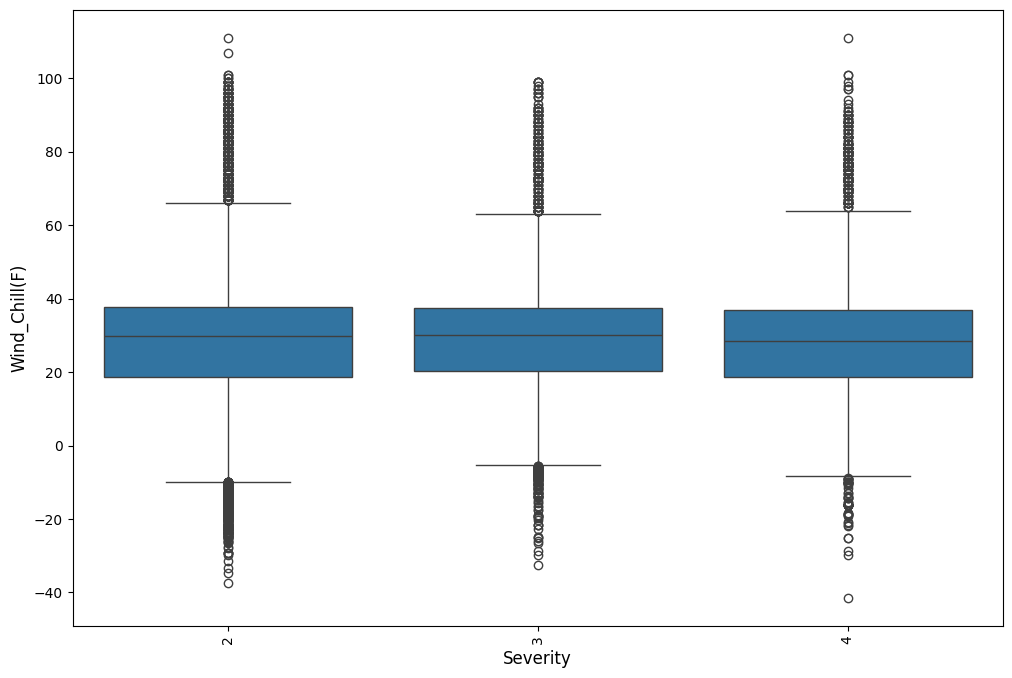

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=df)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

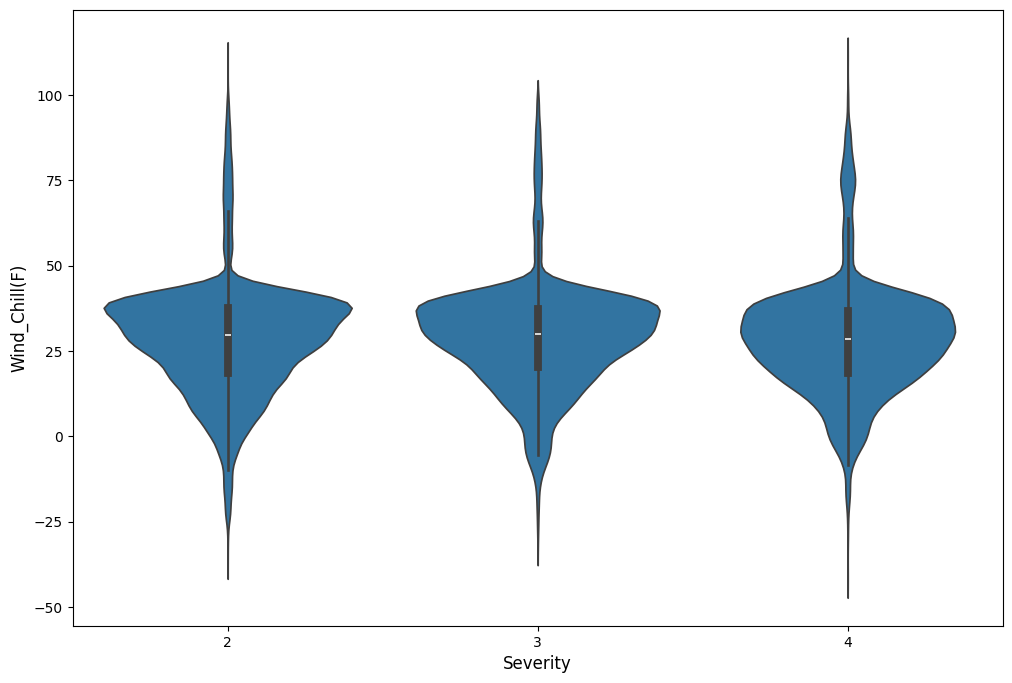

In [30]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Wind_Chill(F)', data=df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.show()

In [33]:
corr_zero_columns = ['Turning_Loop', 'Visibility(mi)', 'Pressure(in)', 'Humidity(%)', 'Temperature(F)']
for col in corr_zero_columns:
    print(col, len(df[col].unique()))


Turning_Loop 2
Visibility(mi) 52
Pressure(in) 447
Humidity(%) 98
Temperature(F) 654


In [35]:
# Save the visualizations and summary statistics
df.to_csv('cleaned_accident_data.csv')


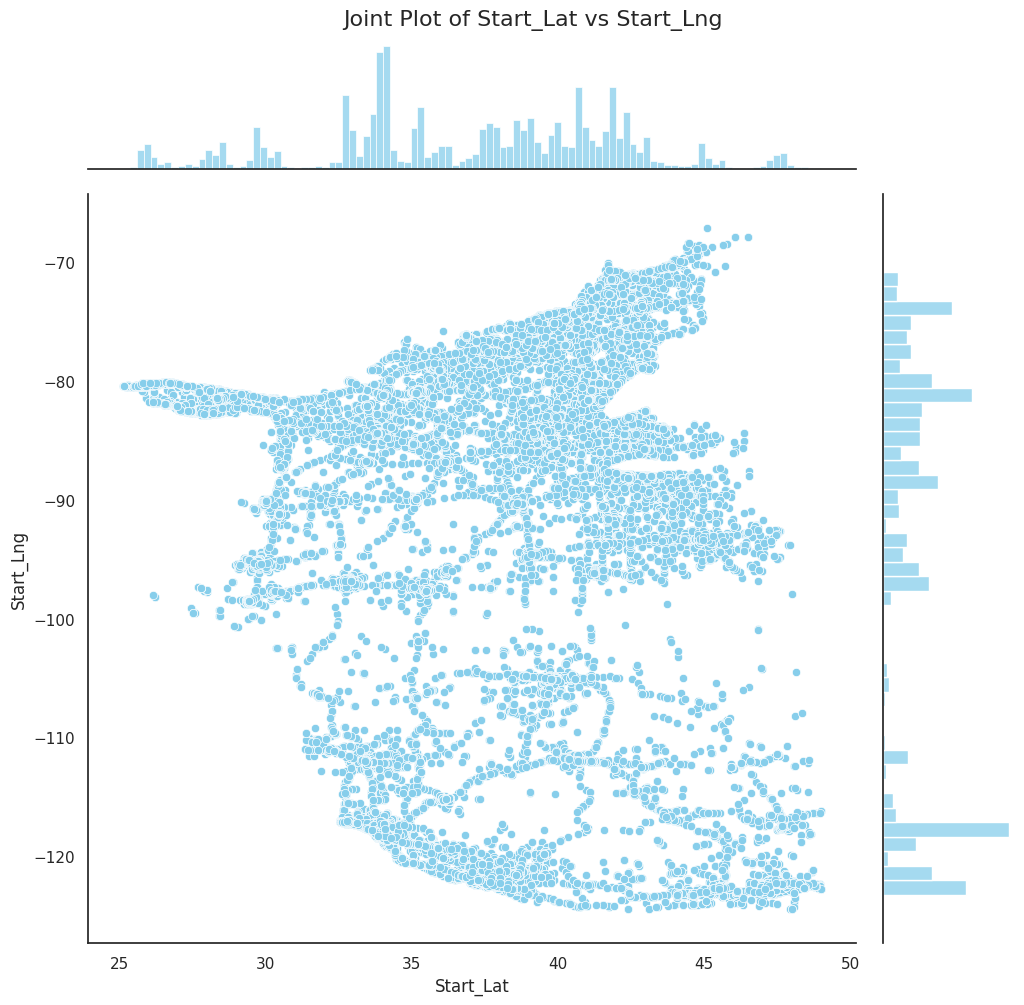

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style and color codes
sns.set(style="white", color_codes=True)

# Create the jointplot with a specific color
joint_plot = sns.jointplot(x=df.Start_Lat.values, y=df.Start_Lng.values,
                           height=10, color='skyblue')

# Modify the labels and title
joint_plot.set_axis_labels('Start_Lat', 'Start_Lng', fontsize=12)
joint_plot.fig.suptitle('Joint Plot of Start_Lat vs Start_Lng', fontsize=16)

# Adjust the title position
joint_plot.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


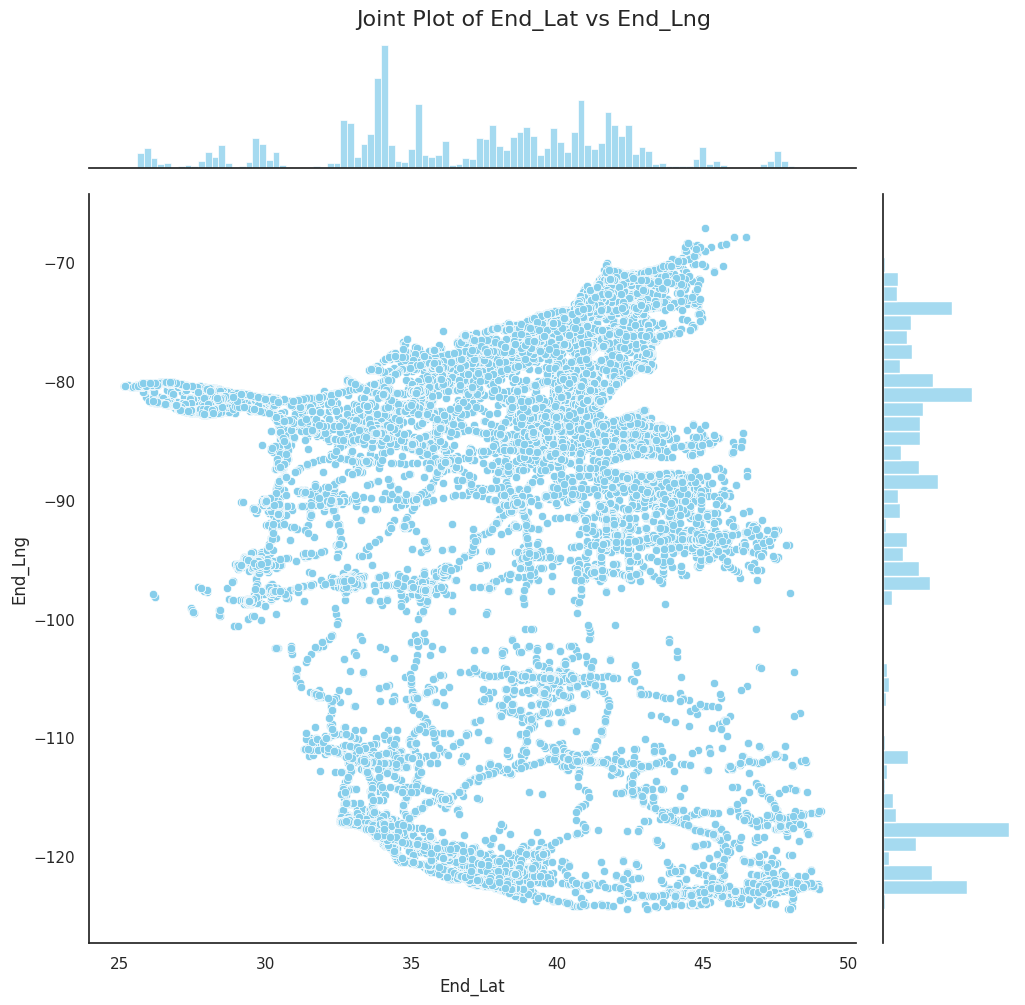

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style and color codes
sns.set(style="white", color_codes=True)

# Create the jointplot with a specific color
joint_plot = sns.jointplot(x=df.End_Lat.values,y=df.End_Lng.values,height=10, color='skyblue')
# Modify the labels and title
joint_plot.set_axis_labels('End_Lat', 'End_Lng', fontsize=12)
joint_plot.fig.suptitle('Joint Plot of End_Lat vs End_Lng', fontsize=16)

# Adjust the title position
joint_plot.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


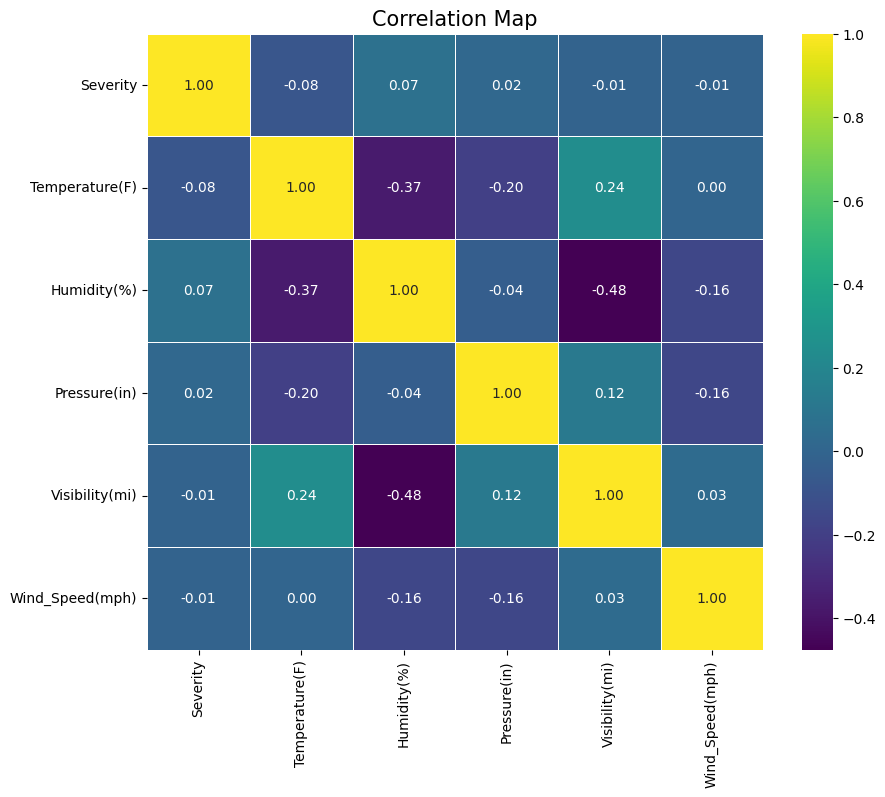

In [25]:
# Sample list for demonstration purposes
corr_df_ = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Filter the dataframe with the selected columns
tem_df = df[corr_df_]

# Calculate the Spearman correlation matrix
corrmat = tem_df.corr(method='spearman')

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, vmax=1, square=True, cmap='viridis', linewidths=0.5, fmt='.2f')
plt.title('Correlation Map', fontsize=15)
plt.show()

**Visualize Accident Hotspots:**

Start_Lat    0
Start_Lng    0
dtype: int64


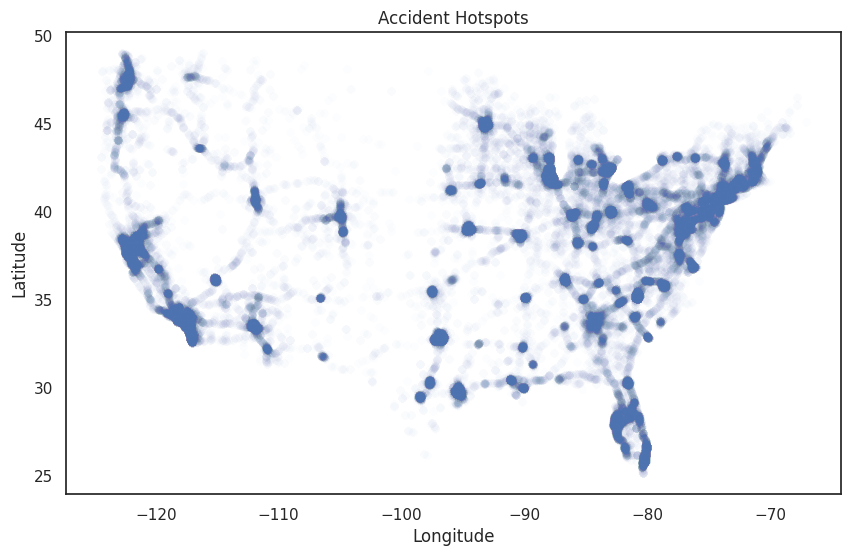

In [45]:
# Check for missing values in Longitude and Latitude
print(df[['Start_Lat', 'Start_Lng']].isnull().sum())

# Drop rows with missing values in Longitude and Latitude
data = df.dropna(subset=['Start_Lat', 'Start_Lng'])

# Visualize accident hotspots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, alpha=0.01)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

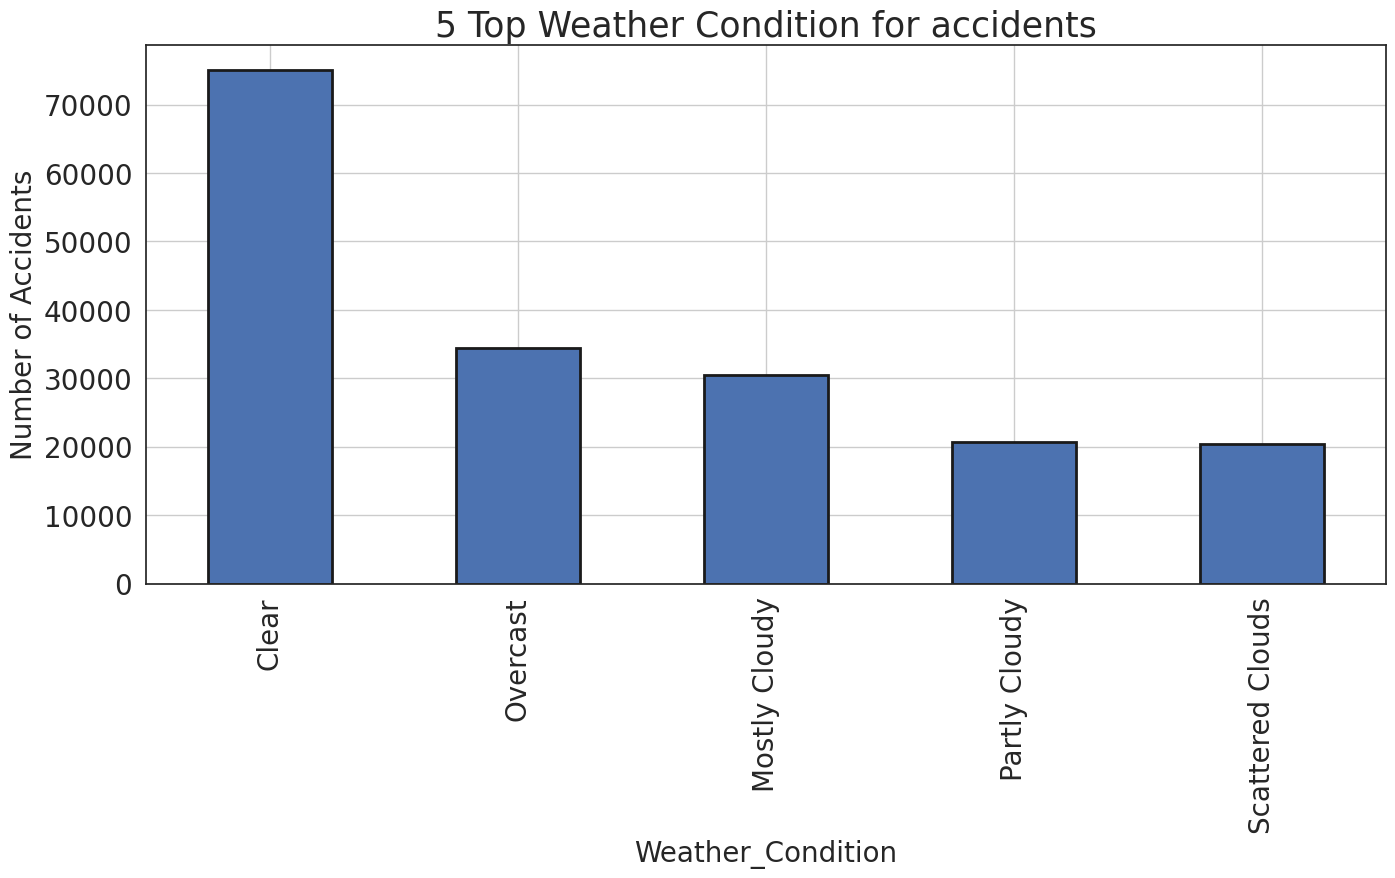

In [46]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [56]:

import folium
import pandas as pd
from google.colab import output
from IPython.display import display, IFrame
from IPython.display import display, HTML
# Create a map centered at the average location of the accidents
map_center = [data['Start_Lat'].mean(), data['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Plot accidents on the map
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(accident_map)

# Save the map to an HTML file
accident_map.save('accident_hotspots.html')

# Display the map inline in Google Colab
with open('accident_hotspots.html', 'r') as f:
    html_data = f.read()
display(HTML(html_data))

In [51]:

# Check for columns that might be related to contributing factors
contributing_factor_columns = [col for col in data.columns if 'factor' in col.lower()]

print("Contributing factor columns found:", contributing_factor_columns)

# Analyze contributing factors if the columns exist
if contributing_factor_columns:
    contributing_factors = data[contributing_factor_columns]
    contributing_factors_counts = contributing_factors.stack().value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=contributing_factors_counts.index, y=contributing_factors_counts.values)
    plt.title('Contributing Factors')
    plt.xlabel('Contributing Factors')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No contributing factor columns found in the dataset.")

Contributing factor columns found: []
No contributing factor columns found in the dataset.
